# Partie 1
## Questions
*1. Justifier pourquoi l’algorithme de la puissance itérée (vu en détails dans le TD de R2.09
dédiée à la SAE) permet de calculer le score de chacune des pages.*

L'algorithme de la puissance itérée permet de calculer le score de chacune des pages car cette fonction permet de calculer un vecteur propre de la matrice, et ce vecteur propre est utilisé afin de trouver le score de chaque page.

*2. Implémenter cet algorithme pour calculer le score de chacune des pages du graphe
précédent. On vérifiera (numériquement) que le vecteur de score obtenu est bien approximativement solution de r = Qr.*

Voici une implémentation Python de la fonction de puissance itérée:
La fonction prend en entrée une Matrice `M` et un seuil d'approximation `e` et retourne un vecteur propre `newX` pour cette matrice, une valeur propre `np.linalg.norm(np.dot(M, X))` et le nombre d'itérations effectuées `n`.

In [4]:
import numpy as np

def puissance_iteree(M, e):
    X = np.array([np.random.randint(1, 10) for _ in range(len(M))])
    newX = X
    n = 1
    while 1:
        newX = (np.dot(M, X)) / np.linalg.norm(np.dot(M, X))
        if np.linalg.norm(newX - X) <= e: break
        X = newX
        n += 1
    return newX, np.linalg.norm(np.dot(M, X)), n

def calculQ(M):
    N = np.sum(M, axis=0)
    q = np.empty((M[0].size, M[0].size))
    for i in range(M[0].size):
        for j in range(M[0].size):
            if N[j] == 0:
                q[i][j] = 0
            else:
                q[i][j] = M[i][j] / N[j]
    return q
    
            

In [5]:
N = 14

# i = horizontal # j = vertical

matriceCPartie1 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], # 14
    ])

vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie1, 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.39347188733989624
Score Page 2: 0.14987443105444712
Score Page 3: 0.20696198287905412
Score Page 4: 0.22870677824159888
Score Page 5: 0.2940769792705614
Score Page 6: 0.40267256064225565
Score Page 7: 0.1533788253946328
Score Page 8: 0.27022345986346863
Score Page 9: 0.1533788253946328
Score Page 10: 0.39345964584735815
Score Page 11: 0.14986944529448104
Score Page 12: 0.2069549665004881
Score Page 13: 0.2286989348252439
Score Page 14: 0.2940667683966233


Afin de vérifier que le calcul est correct, on vérifie `r = Qr`
Pour que cette formule soit vraie, il faut que Q soit 1.
On calcule donc la valeur propre de Q:

In [6]:
print(f"Valeur propre de Q pour matrice: {puissance_iteree(calculQ(matriceCPartie1), 10**(-8))[1]}")

Valeur propre de Q pour matrice: 0.999999999999999


On remarque que la valeur propre de Q est bien égale à 1, donc, `r = Qr`.

*3. Analyser la pertinence du résultat obtenu.*

Le résultat signifie que la page qui sera tout en haut du moteur de recherche sera la page 6, puisqu'elle a le score le plus important. En revanche, les pages 2 et 11 seront les plus basses, puisqu'elles sont les moins importantes.

# Partie 2

In [4]:
N = 5

matriceCPartie2 = np.array([
    [0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    ])

#vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie2, 10**(-6))
    
#for index, elem in enumerate(vecteurPropre):
#    print(f"Score Page {index+1}: {elem}")

On se rend compte que pour les pages ne se faisant *pointer par aucune autre page*, l'algorithme tente de *diviser par 0*. Pour régler cela, on instaure une **matrice de transition** avec un **facteur d'amortissement**.

In [5]:
def calculP(M, N, a):
    P = np.empty((N, N))
    Nj = np.sum(M, axis=0)
    Q = calculQ(M)
    for i in range(N):
        for j in range(N):
            if Nj[j] == 0:
                P[i][j] = 1/N
            else:
                P[i][j] = a * Q[i][j] + (1 - a) / N
    return P

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie2, N, 0.85), 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.8258224487188875
Score Page 2: 0.40102187657867827
Score Page 3: 0.19748687676964533
Score Page 4: 0.2814189131966746
Score Page 5: 0.19748687676964533


On remarque que maintenant les scores sont bien calculés sans erreurs, et que la page 1, qu'on peut facilement déduire aura le plus haut score, puisque pointée par beaucoup de pages, a bien le plus haut score dans nos résultats. On vérifie maintenant que `r = Pr`, ou que `P` soit égal à 1.

In [6]:
print(f"Valeur propre de P pour matrice: {puissance_iteree(calculP(matriceCPartie1, N, 0.85), 10**(-8))[1]}")

Valeur propre de P pour matrice: 0.9337866192484502


On remarque que P est approximativement égal à 1, donc `r = Pr`.

# Partie 3

*1. Analyser l’influence du critère d’arrêt dans l’algorithme de la puissance itérée.*

Plus le seuil de précision augmente, plus on devrait avoir un résultat précis et plus on devrait avoir d'itérations. On vérifie cela grâce à une représentation graphique avec différent seuils de précision. On regardera non seulement le nombre d'itérations, mais aussi la précision du résultat. On fera donc cela avec Q, puisque l'on sait que Q devrait valoir 1.

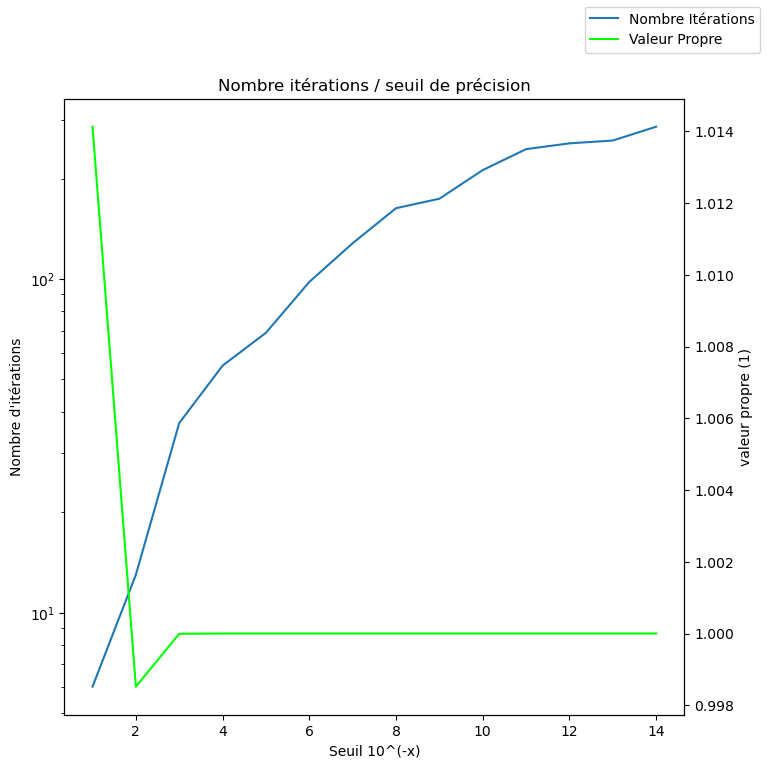

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

l = []
v = []
Q = calculQ(matriceCPartie1)
for x in range(1, 15):
    e = 10**(-x)
    puit = puissance_iteree(Q, e)
    l.append(puit[2])
    v.append(puit[1])
ax1.semilogy(range(1, 15), l)
plt.title("Nombre itérations / seuil de précision")
ax1.set_xlabel("Seuil 10^(-x)")
ax1.set_ylabel("Nombre d'itérations")
ax2.plot(range(1, 15), v, color="#00FF00")
ax2.set_ylabel("valeur propre (1)")
fig.legend(["Nombre Itérations", "Valeur Propre"])

plt.show()

Sur ce graphe, on remarque bien que le nombre d'itérations augmente, et que la valeur propre s'approche de 1, ce qui est le bon résultat. On remarque aussi que tout seuil de précision au delà de 10e-3 n'est pas nécessaire puisque dès 10e-3, la valeur propre vaut 1.

*2. Ajouter quelques hubs (pages qui ont beaucoup de liens sortant) et autorités (pages qui ont beaucoup de liens entrant). Commenter l’impact sur les scores.*

On a donc créé une nouvelle matrice à partir de la matrice de la *Partie 1*:
* 15: Autorité
* 16: Hub
* 17: Hub (aucun lien entrant)
* 18: Égal
* 19: Autorité (aucun lien sortant)
* 20: Autorité\
Voici la nouvelle matrice:

In [8]:
N = 20

matriceCPartie3 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], # 14
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], # 15
    [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 17
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], # 19
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], # 20
    ])

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie3, N, 0.85), 10**(-6))

for index, elem in enumerate(vecteurPropre[0:14]):
    print(f"Score Page {index+1}: {elem}")
print(f"Score Page 18: {vecteurPropre[17]}")

print("Autorités:")
sum = 0
for index in [14, 18, 19]:
    print(f"Score Page {index+1}: {vecteurPropre[index]}")
    sum += vecteurPropre[index]
print(f"Moyenne des autorités: {sum / 3}")

print("Hubs:")
sum = 0
for index in [15, 16]:
    print(f"Score Page {index+1}: {vecteurPropre[index]}")
    sum += vecteurPropre[index]
print(f"Moyenne des Hubs: {sum / 2}")

Score Page 1: 0.17046769594178207
Score Page 2: 0.09057666862733138
Score Page 3: 0.16720078440463737
Score Page 4: 0.16677320532510947
Score Page 5: 0.10390851185504973
Score Page 6: 0.12660782318371483
Score Page 7: 0.06480914680773184
Score Page 8: 0.08707504762272343
Score Page 9: 0.0818008619161289
Score Page 10: 0.4061105910149598
Score Page 11: 0.07782044759305863
Score Page 12: 0.15719681851297576
Score Page 13: 0.30284416709377726
Score Page 14: 0.20009975262130494
Score Page 18: 0.13603536370076677
Autorités:
Score Page 15: 0.3752494288571187
Score Page 19: 0.1301730064015411
Score Page 20: 0.5553833670478566
Moyenne des autorités: 0.35360193410217217
Hubs:
Score Page 16: 0.2182462674589128
Score Page 17: 0.04330103325225721
Moyenne des Hubs: 0.130773650355585


On remarque que, en moyenne, les autorités ont un score plus élevé que les Hubs. C'est explicable par le fait qu'une page gagne en score lorsqu'elle *se fait pointer* par une autre page, alors qu'elle n'en gagne pas lorsqu'elle même *pointe* vers une autre page.

*3. Essayez d’accroître le score de certaines pages. Expliquez votre méthode et validez-la expérimentalement.*

Pour augmenter le score d'une page, on pense qu'il faut:
* Augmenter le nombre de liens entrant dans la page.
* Augmenter le score des pages pointant vers la page.
* Réduire le nombre de liens sortant des pages pointant vers la page.

Ceci peut être fait de manière récursive afin d'augmenter le plus possible le score d'une certaine page.

Voici une nouvelle matrice dans laquelle nous avons suivis ces étapes afin d'augmenter le score de la page 17

In [9]:
matriceCPartie3S17 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], # 14
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], # 15
    [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 16
    [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], # 17 <-- On rajoute ici des liens entrants
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], # 19
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], # 20
    ])

oldVal = vecteurPropre[16]

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie3S17, N, 0.85), 10**(-6))
print(f"Ancien score de la page 17: {oldVal}")
print(f"Nouveau score de la page 17: {vecteurPropre[16]}")
print(f"Une différence de +{vecteurPropre[16] - oldVal}")

Ancien score de la page 17: 0.04330103325225721
Nouveau score de la page 17: 0.31222998070275204
Une différence de +0.26892894745049484


La page 17 ayant gagné du score, la méthode fonctionne bien.

*4. Faites varier le facteur d’amortissement α pour analyser son influence. On rappelle que
α ∈ \[0, 1\].*

Pour cela, on fais une boucle pour varier le facteur d'amortissement de 0 à 1, on a choisit 5 étapes: \[0.2, 0.4, 0.6, 0.8, 1.0\].

On a aussi choisi d'uniquement analyser la page 19 puisqu'elle est un puit.

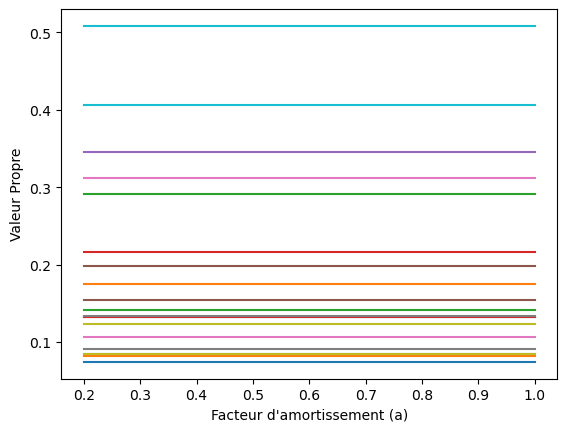

In [10]:
l = []
v = []
for x in range(1, 6):
    a = round(x*0.2, 1)  # a = x * 0.2 pour aller de 0.2 en 0.2
    v.append(a)
    l.append(puissance_iteree(calculP(matriceCPartie3S17, N, 0.85), 10**(-15))[0])

plt.plot(v, l)
plt.xlabel("Facteur d'amortissement (a)")
plt.ylabel("Valeur Propre")
plt.show()

D'après ce graphe, on observe ***aucune*** différence entre les différentes valeurs de facteur d'amortissement. Elle n'a donc aucune influence. On peut donc déduire que même avec un facteur d'amortissement, les pages sont toutes traitées de manière équitable en terme de score, peu importe si la page est un puit ou non.

*Note*: La précision a été augmenté à 10e-15.

# Partie 4

*1. En utilisant le logiciel d’exploration de site web présent sur la page Ametice (et vu en TP de R2.07), construire trois matrices de votre choix et appliquez l’algorithme de PageRank à ces matrices. L’ordre de ces matrices sera compris entre 10 et 30. Ces
matrices, le résultat du logiciel d’exploration ainsi que le site web choisi apparaîtront clairement dans le dossier.*

Pour cela, on fait une fonction qui permet d'extraire une matrice à partir d'un résultat du logiciel.

In [11]:
facebook = [
";extern;www.facebook.com;www.facebook.com/recover/initiate?privacy_mutation_token=eyJ0eXBlIjowLCJjcmVhdGlvbl90aW1lIjoxNzQ4OTQyNTkyLCJjYWxsc2l0ZV9pZCI6MzgxMjI5MDc5NTc1OTQ2fQ%3D%3D&amp;ars=facebook_login&amp;next;www.facebook.com/r.php?entry_point=login;www.facebook.com/pages/create?ref_type=registration_form;www.facebook.com/reg;www.facebook.com/login;www.facebook.com/lite;www.facebook.com/watch;www.facebook.com/votinginformationcenter?entry_point=c2l0ZQ%3D%3D;www.facebook.com/privacy/policy?entry_point=facebook_page_footer;www.facebook.com/privacy/center?entry_point=facebook_page_footer;www.facebook.com/help/cancelcontracts?source=facebook.com;www.facebook.com/ad_campaign/landing.php?placement=pflo&amp;campaign_id=402047449186&amp;nav_source=unknown&amp;extra_1=auto;www.facebook.com/pages/create?ref_type=site_footer;www.facebook.com/careers?ref=pf;www.facebook.com/policies/cookies;www.facebook.com/help/568137493302217;www.facebook.com/policies?ref=pf;www.facebook.com/help?ref=pf",
"extern;0;1;1;1;1;1;1;1;0;0;0;1;0;1;1;1;0;1;1;1",
"www.facebook.com;0;0;0;0;1;0;0;0;0;0;0;0;0;0;1;1;0;0;0;0",
"www.facebook.com/recover/initiate?privacy_mutation_token=eyJ0eXBlIjowLCJjcmVhdGlvbl90aW1lIjoxNzQ4OTQyNTkyLCJjYWxsc2l0ZV9pZCI6MzgxMjI5MDc5NTc1OTQ2fQ%3D%3D&amp;ars=facebook_login&amp;next;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.facebook.com/r.php?entry_point=login;0;1;0;1;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/pages/create?ref_type=registration_form;0;1;0;1;0;1;0;0;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/reg;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/login;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/lite;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/watch;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/votinginformationcenter?entry_point=c2l0ZQ%3D%3D;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/privacy/policy?entry_point=facebook_page_footer;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/privacy/center?entry_point=facebook_page_footer;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/help/cancelcontracts?source=facebook.com;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/ad_campaign/landing.php?placement=pflo&amp;campaign_id=402047449186&amp;nav_source=unknown&amp;extra_1=auto;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/pages/create?ref_type=site_footer;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/careers?ref=pf;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/policies/cookies;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/help/568137493302217;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/policies?ref=pf;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
"www.facebook.com/help?ref=pf;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0;0;0;0",
]

google = [
";extern;www.google.com;www.google.com/imghp?hl=fr&tab=wi;www.google.com/preferences?hl=fr;www.google.com/advanced_search?hl=fr&amp;authuser=0;www.google.com/intl/fr/ads;www.google.com/services;www.google.com/intl/fr/about.html;www.google.com/setprefdomain?prefdom=FR&amp;prev=http://www.google.fr/&amp;sig=68400f66K_dy68n0p_zK1vn_U77MUW0LlNCNs%3D;www.google.com/intl/fr/policies/privacy;www.google.com/intl/fr/policies/terms;www.google.com/advanced_image_search?hl=fr&amp;authuser=0;www.google.com/url?q=https://myactivity.google.com/product/search/controls%3Futm_source%3Dgoogle%26utm_medium%3Dpref-page%26hl%3Dfr%26authuser%3D0&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ7JsICAE&amp;usg=AOvVaw0qPD4hvYtU4ZNhDJwuy0xz;www.google.com/url?q=/setting/search/privateresults%3Fhl%3Dfr%26authuser%3D0&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ-vUJCAI&amp;usg=AOvVaw1cTT4viMvGOJvt0dOCOUSo;www.google.com/url?q=/safesearch%3Fhl%3Dfr%26prev%3Dhttps://www.google.com/preferences%3Fhl%253Dfr&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ1fMKCAM&amp;usg=AOvVaw1rGpQyvS8O7Q7ZOqAAGvhk;www.google.com/url?q=https://support.google.com/websearch/%3Fp%3Dws_results_help%26hl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ8KwCCAg&amp;usg=AOvVaw0wH_fm4ay-T2WfYrZoPLoM;www.google.com/url?q=https://policies.google.com/privacy%3Fhl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ8awCCAk&amp;usg=AOvVaw198wZT9ghO51xTwBL4oib7;www.google.com/url?q=https://policies.google.com/terms%3Fhl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ8qwCCAo&amp;usg=AOvVaw1sleONn-T1GSGjZcnuNvlC;www.google.com/webhp?tab=ww;www.google.com/url?q=https://support.google.com/websearch/%3Fp%3Dws_results_help%26hl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwj7zarp9dSNAxVcU0EAHeg9AtAQ8KwCCAI&amp;usg=AOvVaw0nglcnnm1agd-2bw5alLNm",
"extern;1;1;1;1;1;1;1;1;0;0;0;1;0;1;0;0;0;0;1;0",
"www.google.com;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/imghp?hl=fr&tab=wi;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0",
"www.google.com/preferences?hl=fr;1;1;1;0;1;0;0;0;0;0;0;1;0;0;0;0;0;0;1;0",
"www.google.com/advanced_search?hl=fr&amp;authuser=0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0",
"www.google.com/intl/fr/ads;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0",
"www.google.com/services;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0",
"www.google.com/intl/fr/about.html;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0",
"www.google.com/setprefdomain?prefdom=FR&amp;prev=http://www.google.fr/&amp;sig=68400f66K_dy68n0p_zK1vn_U77MUW0LlNCNs%3D;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/intl/fr/policies/privacy;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0",
"www.google.com/intl/fr/policies/terms;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0",
"www.google.com/advanced_image_search?hl=fr&amp;authuser=0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/url?q=https://myactivity.google.com/product/search/controls%3Futm_source%3Dgoogle%26utm_medium%3Dpref-page%26hl%3Dfr%26authuser%3D0&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ7JsICAE&amp;usg=AOvVaw0qPD4hvYtU4ZNhDJwuy0xz;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/url?q=/setting/search/privateresults%3Fhl%3Dfr%26authuser%3D0&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ-vUJCAI&amp;usg=AOvVaw1cTT4viMvGOJvt0dOCOUSo;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/url?q=/safesearch%3Fhl%3Dfr%26prev%3Dhttps://www.google.com/preferences%3Fhl%253Dfr&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ1fMKCAM&amp;usg=AOvVaw1rGpQyvS8O7Q7ZOqAAGvhk;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/url?q=https://support.google.com/websearch/%3Fp%3Dws_results_help%26hl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ8KwCCAg&amp;usg=AOvVaw0wH_fm4ay-T2WfYrZoPLoM;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/url?q=https://policies.google.com/privacy%3Fhl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ8awCCAk&amp;usg=AOvVaw198wZT9ghO51xTwBL4oib7;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/url?q=https://policies.google.com/terms%3Fhl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwiW6J3p9dSNAxXhUUEAHYckAcoQ8qwCCAo&amp;usg=AOvVaw1sleONn-T1GSGjZcnuNvlC;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/webhp?tab=ww;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
"www.google.com/url?q=https://support.google.com/websearch/%3Fp%3Dws_results_help%26hl%3Dfr%26fg%3D1&amp;opi=89978449&amp;sa=U&amp;ved=0ahUKEwj7zarp9dSNAxVcU0EAHeg9AtAQ8KwCCAI&amp;usg=AOvVaw0nglcnnm1agd-2bw5alLNm;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0",
]

youtube = [
";extern;www.youtube.com;www.youtube.com/about;www.youtube.com/about/press;www.youtube.com/about/copyright;www.youtube.com/t/contact_us;www.youtube.com/creators;www.youtube.com/ads;www.youtube.com/t/terms;www.youtube.com/t/privacy;www.youtube.com/about/policies;www.youtube.com/howyoutubeworks?utm_campaign=ytgen&amp;utm_source=ythp&amp;utm_medium=LeftNav&amp;utm_content=txt&amp;u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Futm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen;www.youtube.com/new;www.youtube.com/s/desktop/9fd1b038/cssbin/www-main-desktop-watch-page-skeleton.css;www.youtube.com/howyoutubeworks;www.youtube.com/trends;www.youtube.com/jobs;www.youtube.com/kids;www.youtube.com/musicpremium;www.youtube.com/channel/UCqVDpXKLmKeBU_yyt_QkItQ",
"extern;0;1;1;1;1;1;1;1;1;1;1;1;1;0;1;1;1;1;1;1",
"www.youtube.com;0;1;1;1;0;1;0;0;1;1;0;0;1;0;0;0;0;0;1;1",
"www.youtube.com/about;0;1;1;0;0;0;0;1;0;0;0;1;1;0;1;1;1;1;1;1",
"www.youtube.com/about/press;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;1",
"www.youtube.com/about/copyright;0;1;1;0;0;0;0;1;0;0;0;1;1;0;1;1;1;1;1;1",
"www.youtube.com/t/contact_us;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;1",
"www.youtube.com/creators;0;1;1;1;0;0;1;1;0;0;0;1;1;0;1;1;1;1;1;1",
"www.youtube.com/ads;0;1;1;1;0;0;0;1;0;0;0;1;1;0;1;1;1;1;1;1",
"www.youtube.com/t/terms;0;1;1;1;0;1;0;1;1;0;0;1;1;0;1;1;1;1;1;1",
"www.youtube.com/t/privacy;0;1;0;0;0;0;0;0;1;0;0;0;1;0;0;0;0;0;1;1",
"www.youtube.com/about/policies;0;1;1;0;0;0;0;1;0;0;0;1;1;0;1;1;1;1;1;1",
"www.youtube.com/howyoutubeworks?utm_campaign=ytgen&amp;utm_source=ythp&amp;utm_medium=LeftNav&amp;utm_content=txt&amp;u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Futm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;1",
"www.youtube.com/new;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;1",
"www.youtube.com/s/desktop/9fd1b038/cssbin/www-main-desktop-watch-page-skeleton.css;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;1",
"www.youtube.com/howyoutubeworks;0;0;1;1;1;0;0;1;0;0;1;1;0;0;1;1;1;1;0;0",
"www.youtube.com/trends;0;0;1;1;0;0;0;1;0;0;0;1;0;0;1;1;1;1;0;0",
"www.youtube.com/jobs;0;0;1;1;0;0;0;1;0;0;0;1;0;0;1;1;1;1;0;0",
"www.youtube.com/kids;0;0;1;1;0;0;0;1;0;0;0;1;0;0;1;1;1;1;0;0",
"www.youtube.com/musicpremium;0;0;1;1;0;0;0;1;0;0;0;1;0;0;1;1;1;1;0;0",
"www.youtube.com/channel/UCqVDpXKLmKeBU_yyt_QkItQ;0;0;1;1;0;0;0;1;0;0;0;1;0;0;1;1;1;1;0;0",
]

import networkx as nx

def readMatrix(resultatLogiciel, N):  # N est le nombre de sites
    matrice = np.empty((N-1, N-1))  # initialisation de la matrice d'adjacence
    siteNames = np.empty(N-1, dtype=object)  # initialisation de la liste des noms de sites
    
    for index, line in enumerate(resultatLogiciel):  # pour toutes les lignes du résultat
        if index == 0 or index == 1:  # on ignore les deux premières lignes (les noms des sites et extern)
            continue
        lineData = line.split(';')[-N+1: -1]   # on ajoute les adjacences du site, en ignorant extern, mais on n'a pas le dernier element,
        lineData.append(line.split(';')[-1])  # donc on l'ajoute après
        lineName = ";".join(line.split(';')[0: -N])    # on prend tous les éléments avant les adjacences comme nom
        siteNames[index-2] = lineName  # on ajoute le nom dans la liste des noms
        matrice[index-2] = np.array(lineData)  # on rajoute la ligne des adjacences dans la matrice
    print(f"Noms des sites:\n{siteNames}")
    print(f"\nMatrice d'adjacence:\n{matrice}\n\n\n")
    #graph = nx.from_numpy_array(matrice)      # on transforme la matrice d'adjacence numpy en réseau networkx pour pouvoir l'afficher
    #pos = nx.spring_layout(graph, seed=3113794652)  # positions for all nodes
    #plt.figure(figsize=(10, 8))               # on initie l'affichage
    #nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)  # on créé le graphique du réseau
    #plt.show()  # on affiche le graphique
    return matrice

print("Facebook:")
matrice1 = readMatrix(facebook, 20)
print("Google:")
matrice2 = readMatrix(google, 20)
print("Youtube:")
matrice3 = readMatrix(youtube, 20)



Facebook:
Noms des sites:
['www.facebook.com'
 'www.facebook.com/recover/initiate?privacy_mutation_token=eyJ0eXBlIjowLCJjcmVhdGlvbl90aW1lIjoxNzQ4OTQyNTkyLCJjYWxsc2l0ZV9pZCI6MzgxMjI5MDc5NTc1OTQ2fQ%3D%3D&amp;ars=facebook_login&amp;next'
 'www.facebook.com/r.php?entry_point=login'
 'www.facebook.com/pages/create?ref_type=registration_form'
 'www.facebook.com/reg' 'www.facebook.com/login' 'www.facebook.com/lite'
 'www.facebook.com/watch'
 'www.facebook.com/votinginformationcenter?entry_point=c2l0ZQ%3D%3D'
 'www.facebook.com/privacy/policy?entry_point=facebook_page_footer'
 'www.facebook.com/privacy/center?entry_point=facebook_page_footer'
 'www.facebook.com/help/cancelcontracts?source=facebook.com'
 'www.facebook.com/ad_campaign/landing.php?placement=pflo&amp;campaign_id=402047449186&amp;nav_source=unknown&amp;extra_1=auto'
 'www.facebook.com/pages/create?ref_type=site_footer'
 'www.facebook.com/careers?ref=pf' 'www.facebook.com/policies/cookies'
 'www.facebook.com/help/568137493302217'
 '

*2. Sur la page Ametice vous trouverez les matrices du réseau routier (issues de OpenStreet Map) de différentes villes. Chaque groupe étudiera la matrice “413 Avenue Gaston Berger” ainsi que la ville qui lui a été affectée (voir sur la page Ametice).* 

Nous avons eu la ville de Nantes.

In [12]:
gaston_matrix = np.load('gaston_berger_data/413 avenue Gaston Berger, Aix en Provence, France_Matrice.npy')
gaston_noms = np.load('gaston_berger_data/413 avenue Gaston Berger, Aix en Provence, France_Id_Noeud.npy')
nantes_matrix = np.load('nantes_data/Nantes, France_Matrice.npy')
nantes_noms = np.load('nantes_data/Nantes, France_Id_Noeud.npy')

gastonVecteur, gastonValeur, gastonIterations = puissance_iteree(calculP(gaston_matrix, gaston_matrix[0].size, 0.85), 10**(-6))
nantesVecteur, nantesValeur, nantesIterations = puissance_iteree(calculP(nantes_matrix, nantes_matrix[0].size, 0.85), 10**(-6))

In [13]:
print(f"Gaston Berger, ID de l'intersection la plus importante:  {gaston_noms[gastonVecteur.argmax()]}")
print(f"Gaston Berger, ID de l'intersection la moins importante: {gaston_noms[gastonVecteur.argmin()]}")

Gaston Berger, ID de l'intersection la plus importante:  267871464
Gaston Berger, ID de l'intersection la moins importante: 33651052


D'après ces résultats, après obtention du noms des intersections par `https://www.openstreetmap.org/node/[id_du_noeud]`, on trouve que:
* L'intersection la plus importante à Gaston Berger est celle entre `Avenue Winston Churchill (27296118)` et `Avenue Robert Schuman (551201754)`.
* L'intersection la moins importante à Gaston Berger est le point entre `Autoroute du Val de Durance (403886915)` et `N 296 (5079436)`.

In [14]:
print(f"Nantes, ID de l'intersection la plus importante:  {nantes_noms[nantesVecteur.argmax()]}")
print(f"Nantes, ID de l'intersection la moins importante: {nantes_noms[nantesVecteur.argmin()]}")

Nantes, ID de l'intersection la plus importante:  595710050
Nantes, ID de l'intersection la moins importante: 216440781


D'après ces résultats, après obtention du noms des intersections par `https://www.openstreetmap.org/node/[id_du_noeud]`, on trouve que:
* L'intersection la plus importante à Nantes est celle entre  `Impasse Maryse Bastié (46614730)` et `Rue de la Saulzinière (108336783)`.
* L'intersection la moins importante à Nantes est celle entre `Rue Surcouf (142343820)` et `Allée Commandant Charcot (46722258)`.

Il faut noter que par "importance", on ne parle pas de *popularité* de l'intersection, mais uniquement leur importance en terme de connection avec les autres intersections.

# Partie 5

On sait que:

$AX = λX <=> (A - λI_N)X = 0$

Puisque $r = Pr$, on peut en déduire que $(I - P)r = 0$

In [50]:
def puissance_directe(M):
    """
    Compute the dominant eigenvector directly using eigenvalue decomposition.
    This is equivalent to the power iteration method but in a single calculation.
    """
    # Compute all eigenvalues and eigenvectors
    valeursPropres, vecteursPropres = np.linalg.eig(M)
    
    # Find the index of the largest eigenvalue (in absolute value)
    indexMaxValeurPropre = np.argmax(np.abs(valeursPropres))
    
    # Extract the dominant eigenvalue and eigenvector
    valeurPropreDominante = valeursPropres[indexMaxValeurPropre]
    vecteurPropreDominante = vecteursPropres[:, indexMaxValeurPropre]
    
    # Normalize the eigenvector (same as your iteration does)
    vecteurPropreDominante = vecteurPropreDominante / np.linalg.norm(vecteurPropreDominante)
    
    # Ensure real values (eigenvectors can be complex even for real matrices)
    if np.isreal(valeurPropreDominante) and np.allclose(vecteurPropreDominante.imag, 0):
        vecteurPropreDominante = vecteurPropreDominante.real
        valeurPropreDominante = valeurPropreDominante.real
    
    return np.abs(vecteurPropreDominante), abs(valeurPropreDominante)

def pagerank_directe(M, alpha=0.85):
    N = M.shape[0]
    Q = calculQ(M)

    # Matrice P : combinaison de Q et de la matrice uniforme
    P = alpha * Q + (1 - alpha) * np.ones((N, N)) / N

    # On veut résoudre : (P - I) r = 0 avec la contrainte sum(r) = 1
    # Équivalent : on remplace une équation par sum(r) = 1
    A = P.T - np.eye(N)
    A[-1] = np.ones(N)

    b = np.zeros(N)
    b[-1] = 1

    r = np.linalg.solve(A, b)
    return r

In [51]:
print(puissance_directe(matriceCPartie3)[0])
print(pagerank_directe(matriceCPartie3))
print(puissance_iteree(matriceCPartie3, 10**(-6))[0])

[0.16247366 0.09962937 0.18521457 0.17403367 0.122181   0.15550335
 0.07973233 0.1037933  0.09837922 0.31170251 0.09986322 0.19337443
 0.26084251 0.2401576  0.37755632 0.24509121 0.04395811 0.147925
 0.16455727 0.55625077]
[0.0539385  0.05353891 0.05344151 0.05340159 0.05548472 0.05296774
 0.05323343 0.05375428 0.05286454 0.04749863 0.04641596 0.05062215
 0.04573048 0.05274777 0.05326056 0.04988852 0.05227183 0.05247217
 0.0075     0.05896672]
[0.16247369 0.0996293  0.18521451 0.17403362 0.12218099 0.15550331
 0.07973232 0.10379329 0.09837917 0.3117025  0.09986316 0.19337439
 0.2608424  0.24015758 0.37755635 0.24509133 0.04395806 0.14792503
 0.16455725 0.55625086]
